In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
ROBOFLOW_WORKSPACE = "unsignedarduino-9db8i"  # @param {"type":"string"}
ROBOFLOW_PROJECT = "chessbot-pieces-qxp5p"  # @param {"type":"string"}
DATASET_VERSION = 4  # @param {"type":"integer","placeholder":"1, 2, 3..."}

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key=userdata.get("ROBOFLOW_API_KEY"))
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
version = project.version(DATASET_VERSION)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chessbot-Pieces-4 in folder:: 100%|██████████| 1525/1525 [00:00<00:00, 2051.71it/s]


In [3]:
from pathlib import Path
from ultralytics import YOLO

model = YOLO("yolo11n-cls.pt")

dset_path = Path(dataset.location)

results = model.train(data=dset_path, epochs=200, imgsz=64, plots=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 23.7MB/s]


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/Chessbot-Pieces-4, epochs=200, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.8MB/s]


AMP: checks passed ✅


train: Scanning /content/Chessbot-Pieces-4/train... 1293 images, 0 corrupt: 100%|██████████| 1293/1293 [00:00<00:00, 4186.45it/s]

train: New cache created: /content/Chessbot-Pieces-4/train.cache



val: Scanning /content/Chessbot-Pieces-4/test... 62 images, 0 corrupt: 100%|██████████| 62/62 [00:00<00:00, 2336.95it/s]

val: New cache created: /content/Chessbot-Pieces-4/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 200 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/200     0.153G      2.984         16         64:  14%|█▎        | 11/81 [00:01<00:06, 11.51it/s]

      1/200     0.153G      2.922         16         64:  26%|██▌       | 21/81 [00:02<00:03, 15.58it/s]
100%|██████████| 755k/755k [00:00<00:00, 20.4MB/s]
      1/200     0.153G       2.63         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.36it/s]

                   all      0.323      0.758



      Epoch    GPU_mem       loss  Instances       Size


      2/200     0.145G      1.701         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 70.67it/s]

                   all      0.742      0.984



      Epoch    GPU_mem       loss  Instances       Size


      3/200     0.145G      1.039         13         64: 100%|██████████| 81/81 [00:06<00:00, 13.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.33it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


      4/200     0.145G      0.865         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.57it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


      5/200     0.145G     0.8085         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.58it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


      6/200     0.145G     0.7128         13         64: 100%|██████████| 81/81 [00:06<00:00, 13.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.45it/s]

                   all      0.919          1



      Epoch    GPU_mem       loss  Instances       Size


      7/200     0.145G     0.7125         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 65.38it/s]

                   all      0.919          1



      Epoch    GPU_mem       loss  Instances       Size


      8/200     0.145G     0.7001         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.52it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      9/200     0.145G     0.5974         13         64: 100%|██████████| 81/81 [00:06<00:00, 13.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.25it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


     10/200     0.145G     0.6153         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.34it/s]


                   all      0.968          1

      Epoch    GPU_mem       loss  Instances       Size


     11/200     0.145G      0.566         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.73it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


     12/200     0.145G     0.5552         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.10it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     13/200     0.145G     0.5259         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.84it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


     14/200     0.145G     0.5365         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.45it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     15/200     0.145G      0.539         13         64: 100%|██████████| 81/81 [00:06<00:00, 11.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.86it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     16/200     0.145G     0.4838         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     17/200     0.145G      0.499         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.53it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     18/200     0.145G     0.4472         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.02it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     19/200     0.145G     0.4787         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.87it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     20/200     0.145G     0.4488         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.41it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     21/200     0.145G     0.4603         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.96it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     22/200     0.145G     0.4697         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.52it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     23/200     0.145G     0.4357         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.09it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


     24/200     0.145G     0.4165         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.56it/s]


                   all      0.984          1

      Epoch    GPU_mem       loss  Instances       Size


     25/200     0.145G     0.4111         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     26/200     0.145G     0.4059         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 65.23it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     27/200     0.145G     0.4037         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.51it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     28/200     0.145G     0.3526         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.71it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     29/200     0.145G     0.3705         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 52.81it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     30/200     0.145G     0.3533         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 62.61it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     31/200     0.145G     0.3262         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.23it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     32/200     0.145G     0.3815         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.34it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     33/200     0.145G     0.3574         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.83it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     34/200     0.145G     0.3551         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.48it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     35/200     0.145G     0.3258         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.05it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     36/200     0.145G     0.3474         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.99it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     37/200     0.145G     0.3459         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.42it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     38/200     0.145G     0.3164         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 55.32it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     39/200     0.145G     0.3118         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.04it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     40/200     0.145G     0.3328         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 68.05it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     41/200     0.145G     0.2892         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.03it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     42/200     0.145G      0.301         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.25it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     43/200     0.145G     0.3603         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.80it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     44/200     0.145G     0.2766         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 51.49it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     45/200     0.145G     0.3078         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.54it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     46/200     0.145G     0.3016         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.54it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     47/200     0.145G     0.2867         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.20it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     48/200     0.145G      0.303         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.69it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     49/200     0.145G     0.3189         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 55.87it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     50/200     0.145G     0.2745         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.84it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     51/200     0.145G     0.2692         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.13it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     52/200     0.145G     0.2575         13         64: 100%|██████████| 81/81 [00:05<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 59.28it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     53/200     0.145G     0.3081         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.25it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     54/200     0.145G     0.2738         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.40it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     55/200     0.145G      0.308         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.26it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     56/200     0.145G     0.2918         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 65.65it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     57/200     0.145G     0.2719         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.90it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     58/200     0.145G     0.2675         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.80it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     59/200     0.145G     0.2649         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.45it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     60/200     0.145G     0.2305         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.73it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     61/200     0.145G     0.2524         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.81it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     62/200     0.145G      0.239         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.64it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     63/200     0.145G     0.2407         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.29it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     64/200     0.145G     0.2162         13         64: 100%|██████████| 81/81 [00:05<00:00, 16.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.91it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     65/200     0.145G     0.2567         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.96it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     66/200     0.145G     0.2286         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     67/200     0.145G     0.2401         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     68/200     0.145G     0.2066         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.52it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     69/200     0.145G     0.2153         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.15it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     70/200     0.145G     0.2422         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.12it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     71/200     0.145G     0.2408         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.12it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


     72/200     0.145G     0.2185         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.43it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     73/200     0.145G     0.2345         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.07it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     74/200     0.145G     0.2538         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 60.91it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     75/200     0.145G     0.2344         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.66it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     76/200     0.145G     0.1864         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.21it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     77/200     0.145G     0.2389         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.96it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     78/200     0.145G     0.2211         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     79/200     0.145G     0.2368         13         64: 100%|██████████| 81/81 [00:06<00:00, 13.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.03it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     80/200     0.145G     0.2343         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 58.59it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     81/200     0.145G     0.2126         13         64: 100%|██████████| 81/81 [00:03<00:00, 20.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.98it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     82/200     0.145G     0.1984         13         64: 100%|██████████| 81/81 [00:06<00:00, 13.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 62.66it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     83/200     0.145G     0.2612         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.08it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     84/200     0.145G     0.2043         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.66it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     85/200     0.145G     0.1795         13         64: 100%|██████████| 81/81 [00:05<00:00, 13.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.87it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     86/200     0.145G     0.2344         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.26it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     87/200     0.145G     0.1959         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.85it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     88/200     0.145G     0.2077         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.55it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     89/200     0.145G     0.1912         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.06it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     90/200     0.145G      0.185         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 63.87it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     91/200     0.145G     0.1936         13         64: 100%|██████████| 81/81 [00:05<00:00, 13.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.24it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


     92/200     0.145G     0.1595         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     93/200     0.145G     0.2043         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.66it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     94/200     0.145G     0.1623         13         64: 100%|██████████| 81/81 [00:06<00:00, 13.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.08it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     95/200     0.145G     0.1568         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.62it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     96/200     0.145G     0.1986         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.44it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     97/200     0.145G     0.1979         13         64: 100%|██████████| 81/81 [00:05<00:00, 13.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.47it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     98/200     0.145G     0.1591         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.96it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     99/200     0.145G     0.1926         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.60it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


    100/200     0.145G     0.1642         13         64: 100%|██████████| 81/81 [00:05<00:00, 13.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.37it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    101/200     0.145G     0.1628         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.11it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


    102/200     0.145G      0.154         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.53it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


    103/200     0.145G     0.1476         13         64: 100%|██████████| 81/81 [00:05<00:00, 13.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.89it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    104/200     0.145G     0.1459         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 53.55it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    105/200     0.145G     0.1717         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 51.86it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    106/200     0.145G     0.1673         13         64: 100%|██████████| 81/81 [00:05<00:00, 13.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.49it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    107/200     0.145G     0.1842         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.45it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    108/200     0.145G     0.1613         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.41it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    109/200     0.145G     0.1525         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.56it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    110/200     0.145G     0.1738         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.00it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    111/200     0.145G     0.1272         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.18it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    112/200     0.145G     0.1776         13         64: 100%|██████████| 81/81 [00:05<00:00, 13.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 53.55it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    113/200     0.145G     0.1594         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.48it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    114/200     0.145G     0.1337         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.17it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


    115/200     0.145G     0.1624         13         64: 100%|██████████| 81/81 [00:05<00:00, 13.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.91it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    116/200     0.145G     0.1589         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 71.49it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    117/200     0.145G     0.1654         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    118/200     0.145G     0.1566         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.07it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    119/200     0.145G     0.1277         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.93it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    120/200     0.145G     0.1246         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.62it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    121/200     0.145G     0.1617         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    122/200     0.145G     0.1689         13         64: 100%|██████████| 81/81 [00:04<00:00, 20.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.77it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    123/200     0.145G     0.1664         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 46.02it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    124/200     0.145G     0.1447         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.62it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    125/200     0.145G     0.1331         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 54.23it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    126/200     0.145G     0.1245         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.95it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    127/200     0.145G     0.1177         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.26it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    128/200     0.145G      0.117         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.44it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    129/200     0.145G     0.1415         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 58.74it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    130/200     0.145G     0.1541         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.99it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    131/200     0.145G     0.1626         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.30it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    132/200     0.145G     0.1097         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.84it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


    133/200     0.145G     0.1281         13         64: 100%|██████████| 81/81 [00:05<00:00, 16.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 56.12it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


    134/200     0.145G     0.1546         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.38it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    135/200     0.145G     0.1094         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.41it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    136/200     0.145G     0.1489         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.97it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    137/200     0.145G      0.129         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.48it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    138/200     0.145G     0.1286         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    139/200     0.145G     0.1258         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.14it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


    140/200     0.145G     0.1377         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.87it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    141/200     0.145G     0.1136         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.33it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    142/200     0.145G     0.1298         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.82it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    143/200     0.145G     0.1149         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.85it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    144/200     0.145G     0.1294         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.08it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    145/200     0.145G     0.1386         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.54it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    146/200     0.145G     0.1315         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.96it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    147/200     0.145G      0.131         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    148/200     0.145G     0.1329         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 49.96it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    149/200     0.145G     0.1131         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    150/200     0.145G     0.0991         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.44it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


    151/200     0.145G     0.1365         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    152/200     0.145G     0.1092         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 55.16it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    153/200     0.145G    0.09801         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.20it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    154/200     0.145G     0.1255         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.70it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    155/200     0.145G     0.1103         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.00it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    156/200     0.145G     0.0983         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.07it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    157/200     0.145G      0.115         13         64: 100%|██████████| 81/81 [00:05<00:00, 16.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.09it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    158/200     0.145G      0.129         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 50.06it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    159/200     0.145G     0.1068         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.80it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    160/200     0.145G     0.1081         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.60it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    161/200     0.145G    0.08763         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.53it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    162/200     0.145G     0.1038         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.57it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    163/200     0.145G     0.1148         13         64: 100%|██████████| 81/81 [00:05<00:00, 16.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.48it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    164/200     0.145G    0.09692         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.78it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    165/200     0.145G     0.1105         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.60it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    166/200     0.145G     0.1172         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    167/200     0.145G    0.09907         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.49it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    168/200     0.145G      0.136         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.42it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    169/200     0.145G     0.1035         13         64: 100%|██████████| 81/81 [00:05<00:00, 16.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    170/200     0.145G    0.07877         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.66it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    171/200     0.145G    0.09497         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.16it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    172/200     0.145G     0.1062         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.42it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    173/200     0.145G     0.1074         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.41it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    174/200     0.145G     0.1179         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.20it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    175/200     0.145G     0.1162         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.57it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    176/200     0.145G    0.09497         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.65it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


    177/200     0.145G     0.1029         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.64it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    178/200     0.145G      0.092         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.14it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    179/200     0.145G     0.1078         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.15it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    180/200     0.145G    0.07884         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.25it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    181/200     0.145G     0.1097         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.60it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    182/200     0.145G     0.0871         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.94it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    183/200     0.145G    0.08187         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.55it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    184/200     0.145G    0.08176         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.78it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    185/200     0.145G    0.09041         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    186/200     0.145G    0.09567         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.60it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    187/200     0.145G    0.08004         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.78it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    188/200     0.145G    0.07987         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.06it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    189/200     0.145G    0.09793         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.74it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    190/200     0.145G    0.08207         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.25it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    191/200     0.145G     0.1101         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    192/200     0.145G     0.0804         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.80it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    193/200     0.145G    0.07713         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.89it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    194/200     0.145G     0.0731         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.13it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    195/200     0.145G    0.08927         13         64: 100%|██████████| 81/81 [00:05<00:00, 14.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.80it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    196/200     0.145G    0.07687         13         64: 100%|██████████| 81/81 [00:04<00:00, 17.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.01it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    197/200     0.145G    0.07252         13         64: 100%|██████████| 81/81 [00:04<00:00, 18.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.72it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    198/200     0.145G    0.06193         13         64: 100%|██████████| 81/81 [00:05<00:00, 15.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.91it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    199/200     0.145G    0.08933         13         64: 100%|██████████| 81/81 [00:04<00:00, 16.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.70it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    200/200     0.145G    0.08055         13         64: 100%|██████████| 81/81 [00:04<00:00, 19.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.79it/s]

                   all          1          1



200 epochs completed in 0.293 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,543,958 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Chessbot-Pieces-4/train... found 1293 images in 14 classes ✅ 
val: None...
test: /content/Chessbot-Pieces-4/test... found 62 images in 14 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.76it/s]


                   all          1          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


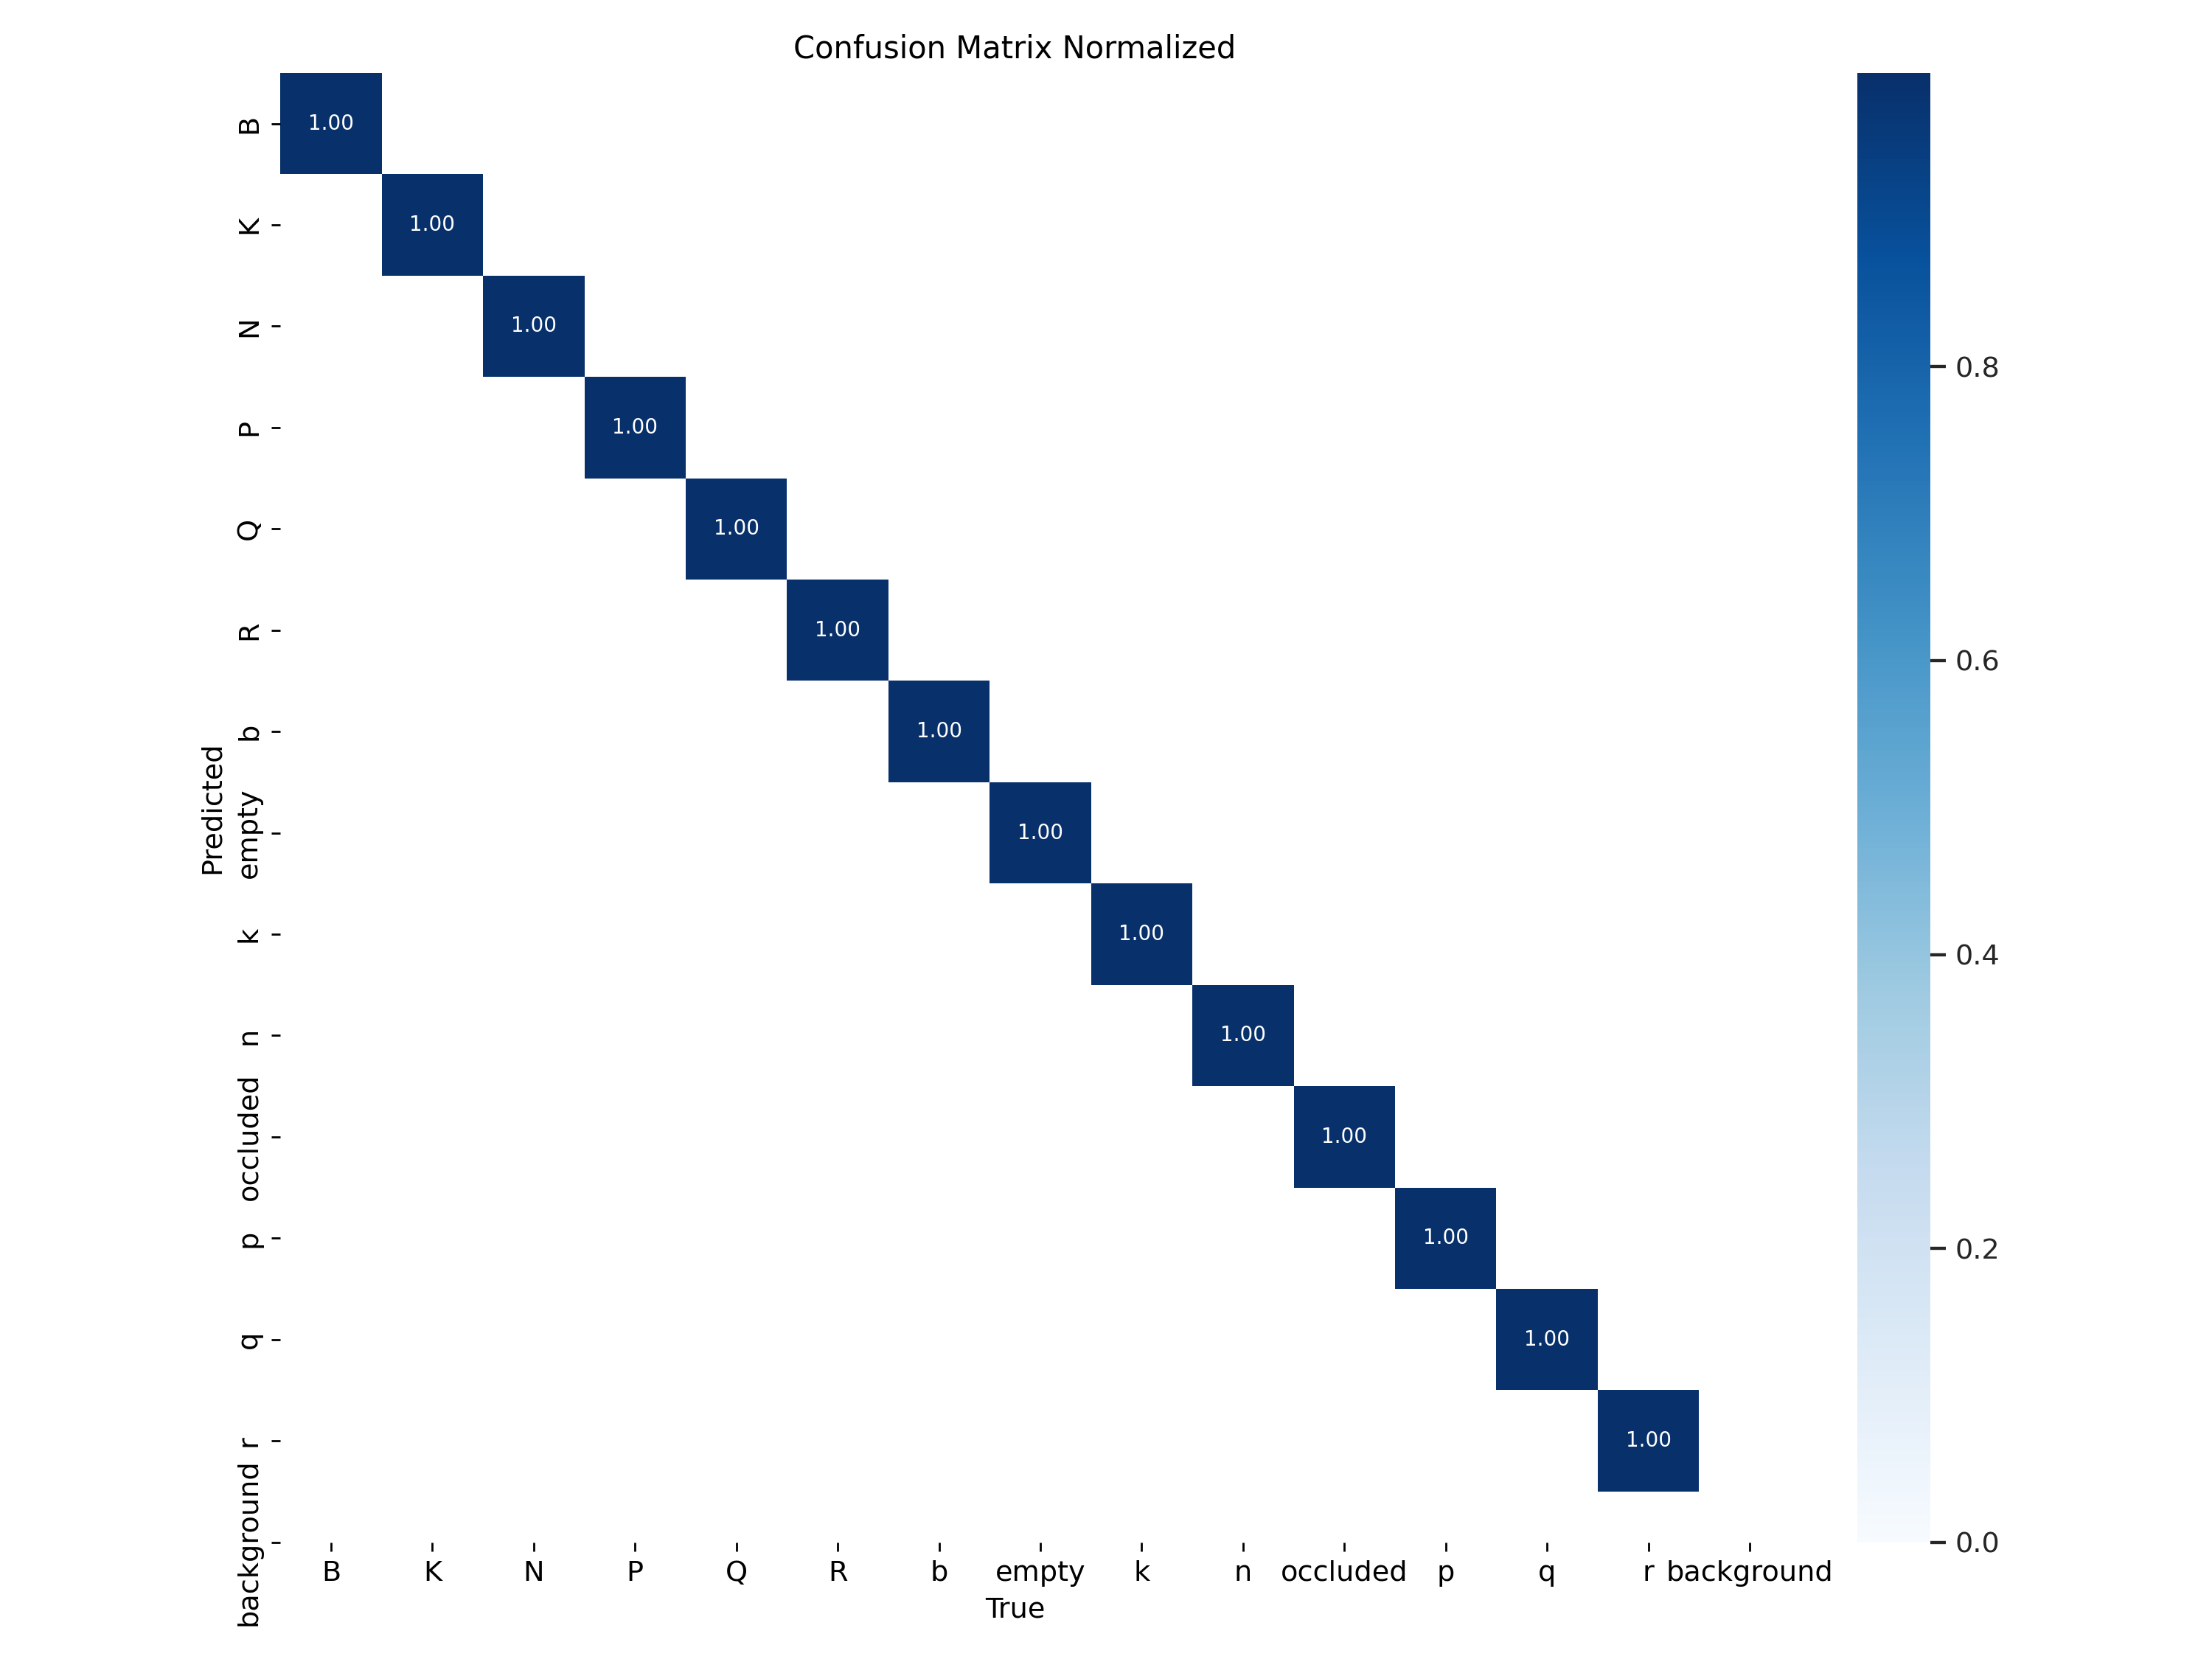

In [4]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/classify/train/confusion_matrix_normalized.png', width=600)

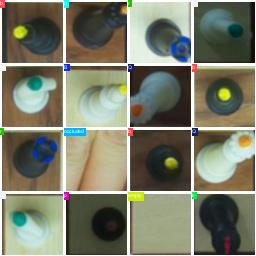

In [5]:
IPyImage(filename=f'runs/classify/train/val_batch0_pred.jpg', width=600)

In [6]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"runs/classify/train")

View the status of your deployment at: https://app.roboflow.com/unsignedarduino-9db8i/chessbot-pieces-qxp5p/4
Share your model with the world at: https://universe.roboflow.com/unsignedarduino-9db8i/chessbot-pieces-qxp5p/model/4
